In [135]:
# 2019년 3월 BC 카드 분석본  

In [136]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [137]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [162]:
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df['기준년월'].value_counts()

306122


202003    79895
202103    75513
201909    64531
202009    46072
201903    40111
Name: 기준년월, dtype: int64

In [163]:
df_1903 = df[df['기준년월'] == 201903]
print(len(df_1903))

40111


In [140]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
5,201903,12,뷰티,1210,스킨케어,남성,50대,성인자녀가구,서울특별시,강동구,길동,874323,8
6,201903,12,뷰티,1212,바디케어,남성,40대,초중고자녀가구,서울특별시,강동구,길동,444666,13
7,201903,10,의류,1010,여성의류,여성,40대,신혼영유아가구,서울특별시,강동구,길동,1048087,17
8,201903,15,전자,1510,가전,여성,20대,1인가구,서울특별시,강동구,길동,2429276,17
9,201903,18,건강,1810,건강식품,남성,40대,초중고자녀가구,서울특별시,강동구,길동,529505,17


In [141]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    25599
남성    14512
Name: 성별, dtype: int64


<AxesSubplot:>

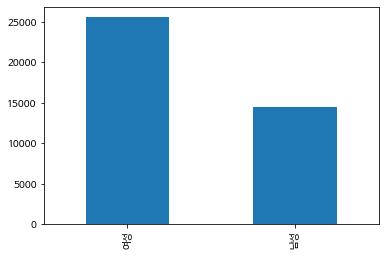

In [142]:
print(df_1903['성별'].value_counts())
df_1903['성별'].value_counts().plot.bar()

6 개
['60대 이상', '20대', '40대', '20세 미만', '50대', '30대']
40대       13614
30대       13186
20대        6654
50대        5042
60대 이상     1572
20세 미만       43
Name: 연령, dtype: int64


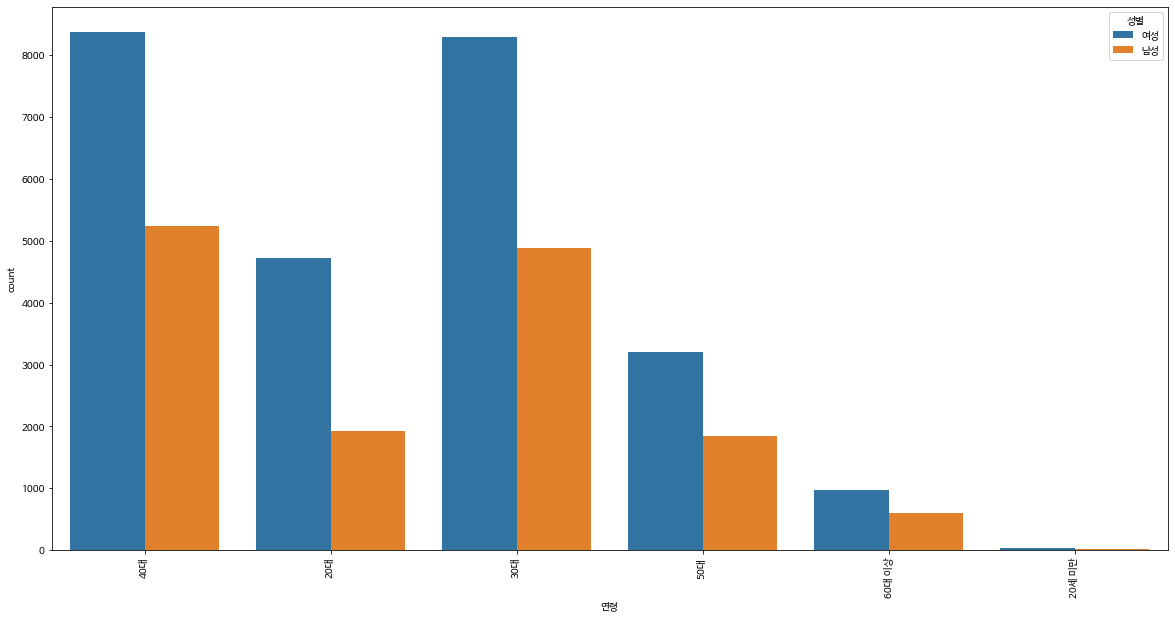

여성 연령 분포 및 순위
40대       8368
30대       8301
20대       4729
50대       3202
60대 이상     968
20세 미만      31
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
40대       5246
30대       4885
20대       1925
50대       1840
60대 이상     604
20세 미만      12
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


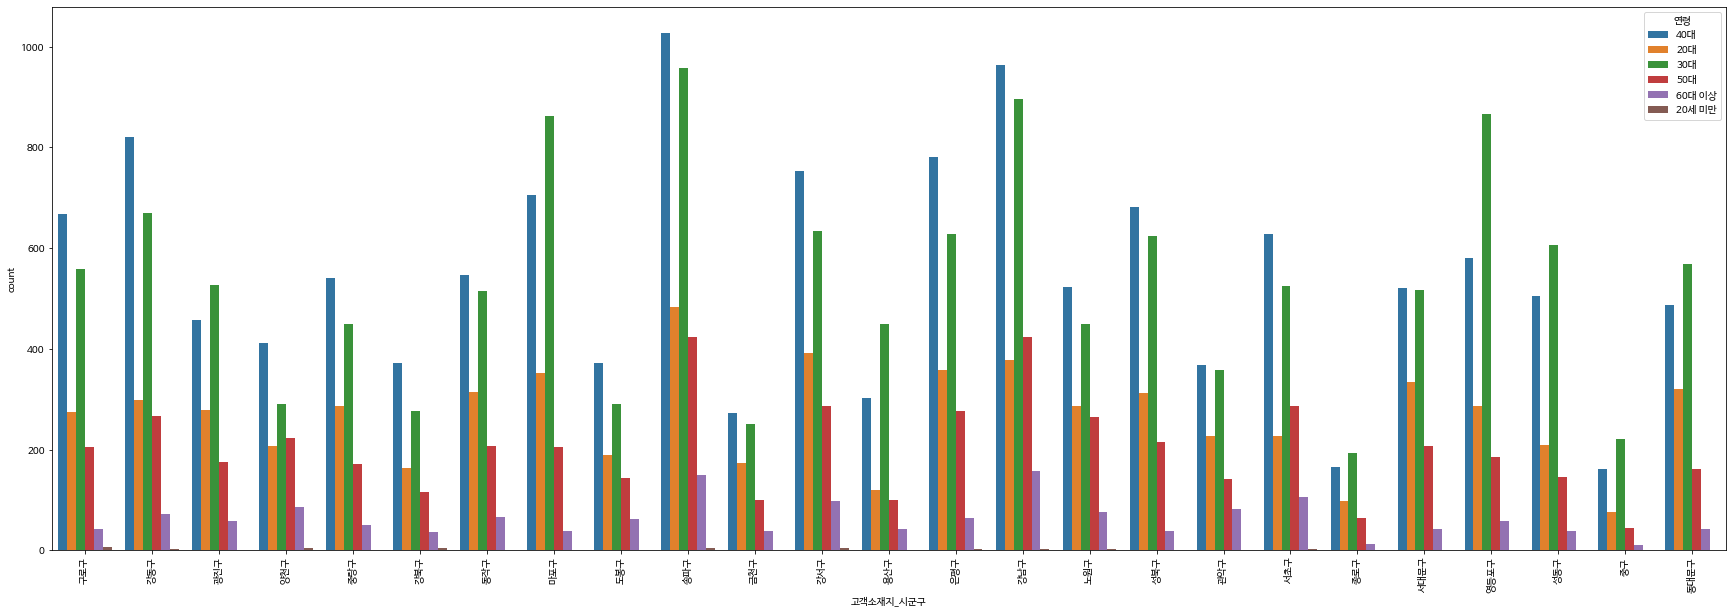

In [143]:
age = list(set(df_1903['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_1903['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

df_1903_female =df_1903[df_1903['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_1903_female['연령'].value_counts())
print(df_1903_female['연령'].value_counts().rank(ascending = False))

df_1903_male =df_1903[df_1903['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_1903_male['연령'].value_counts())
print(df_1903_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

25 개
['성북구', '금천구', '송파구', '은평구', '서대문구', '영등포구', '서초구', '마포구', '광진구', '관악구', '중랑구', '강서구', '강북구', '도봉구', '노원구', '성동구', '동작구', '강동구', '종로구', '중구', '강남구', '용산구', '구로구', '양천구', '동대문구']
송파구     3048
강남구     2820
강서구     2169
마포구     2165
강동구     2130
은평구     2112
영등포구    1977
성북구     1874
서초구     1775
구로구     1754
동작구     1650
서대문구    1622
노원구     1604
동대문구    1583
성동구     1506
중랑구     1500
광진구     1498
양천구     1224
관악구     1178
도봉구     1057
용산구     1014
강북구      967
금천구      834
종로구      533
중구       517
Name: 고객소재지_시군구, dtype: int64


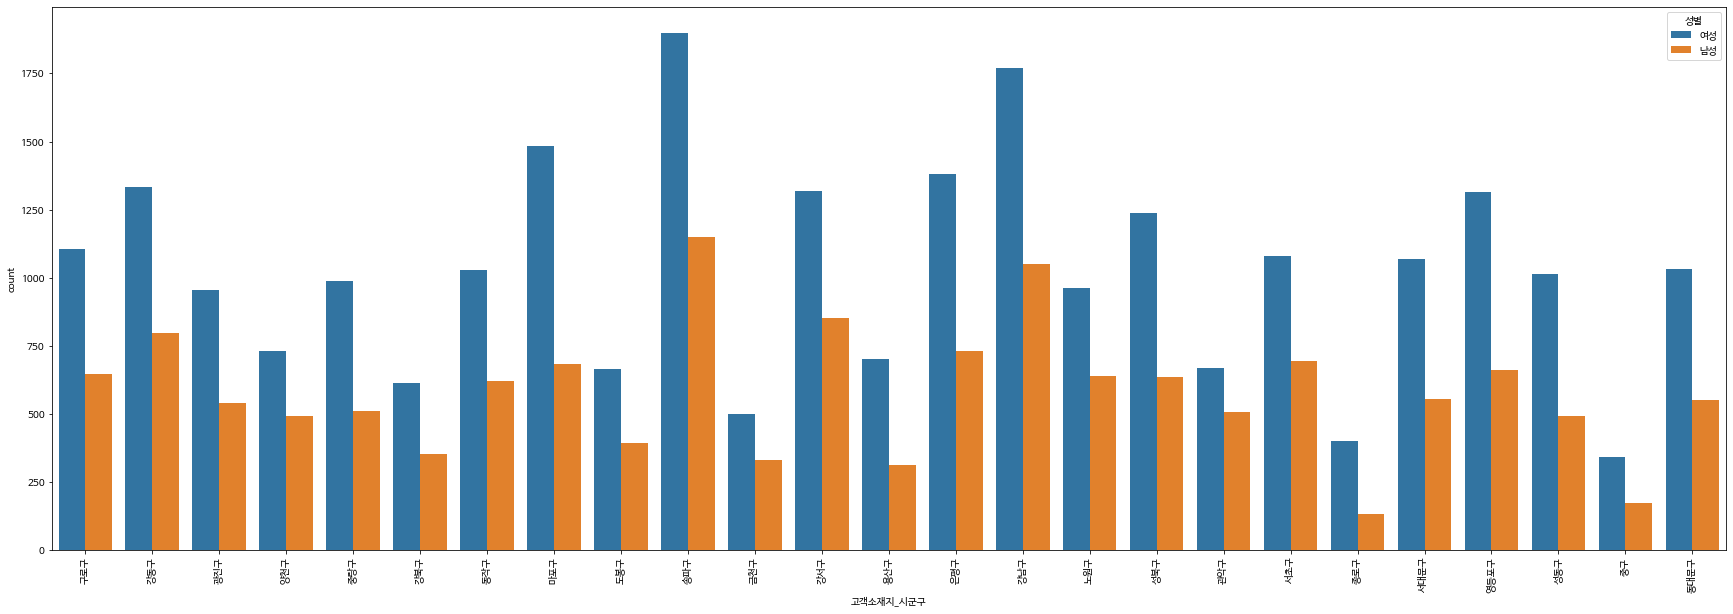

송파구    1.0
강남구    2.0
마포구    3.0
은평구    4.0
강동구    5.0
Name: 고객소재지_시군구, dtype: float64
송파구    1.0
강남구    2.0
강서구    3.0
강동구    4.0
은평구    5.0
Name: 고객소재지_시군구, dtype: float64


In [144]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

print(df_1903['고객소재지_시군구'].value_counts()) 

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

print(df_1903_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_1903_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['성인자녀가구', '신혼영유아가구', '노인가구', '초중고자녀가구', '1인가구']
신혼영유아가구    15900
초중고자녀가구     9029
1인가구        7896
성인자녀가구      5714
노인가구        1572
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

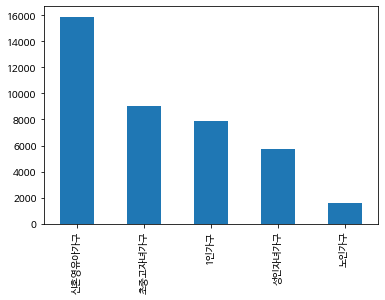

In [145]:
family = list(set(df_1903['가구생애주기']))
print(len(family),'개')
print(family)

print(df_1903['가구생애주기'].value_counts())
df_1903['가구생애주기'].value_counts().plot.bar()

In [146]:
# 각 지역구가 맞는지 판별하기 위한 True/False
iscounty = []
for i in range(len(sigoongu)):
    iscounty.append(df['고객소재지_시군구'] == sigoongu[i])
    
# 각 지역구의 데이터프레임
counties = []
for j in range(len(sigoongu)):
    counties.append(df[iscounty[j]])

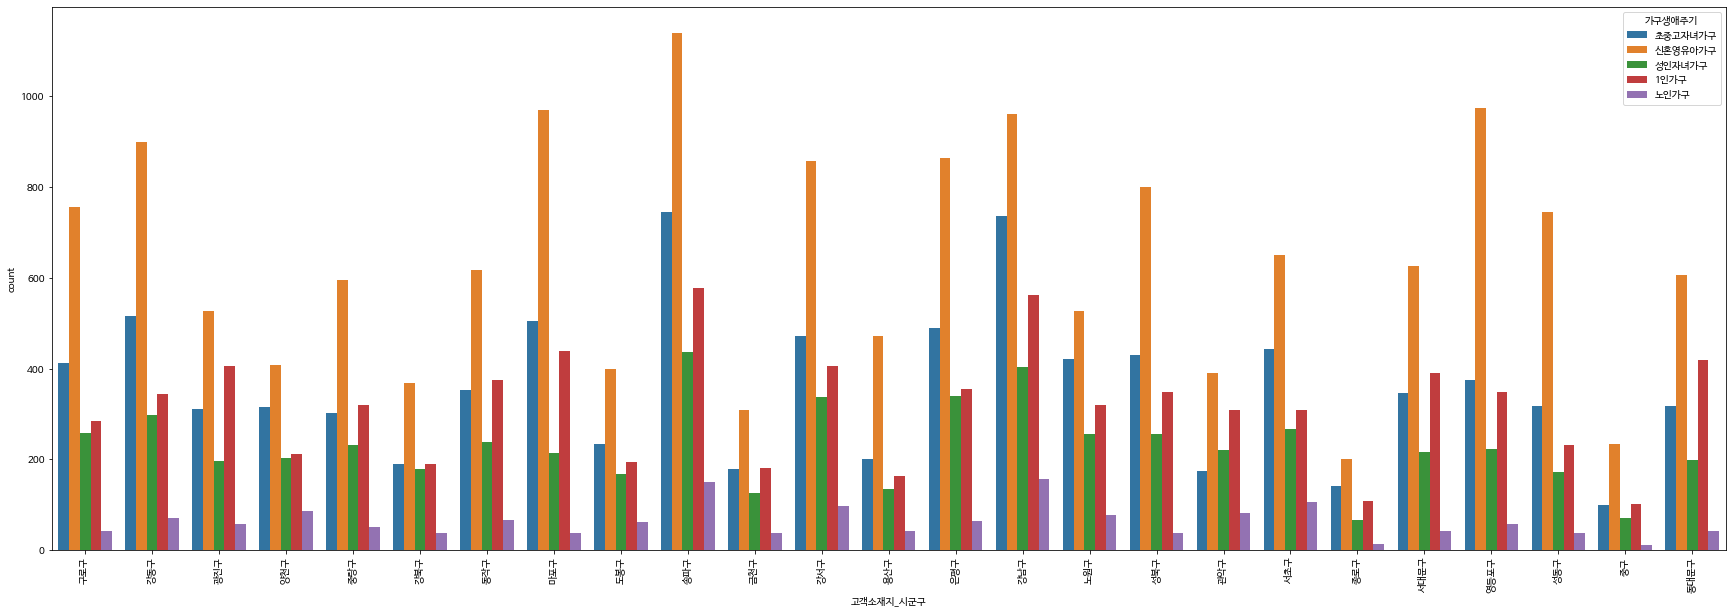

In [147]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

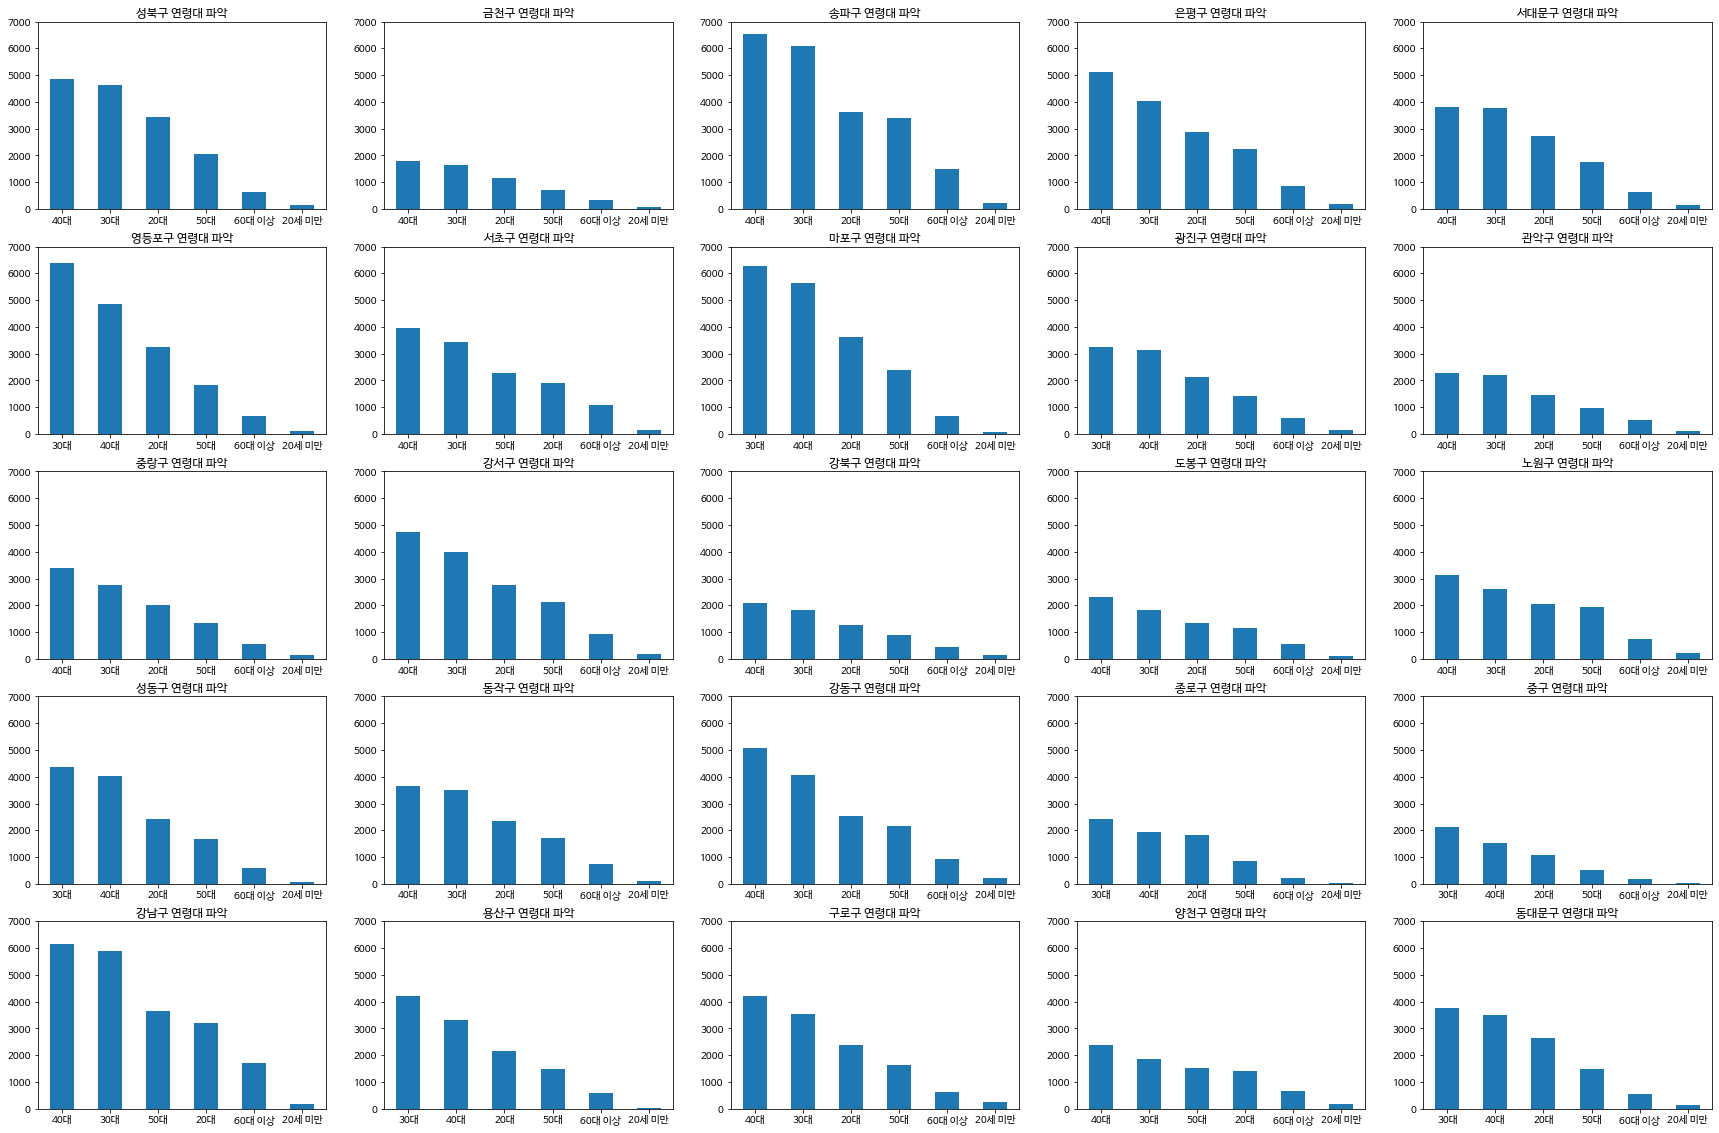

In [148]:
plt.figure(figsize=(30,20))

for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    counties[i]['연령'].value_counts().plot.bar()
    plt.ylim([0, 7000])
    plt.xticks(rotation=0)
    plt.title(sigoongu[i]+ ' 연령대 파악')

plt.show()

In [149]:
large_category = list(set(df_1903['품목대분류명']))
# print(large_category)

middle_category = list(set(df_1903['품목중분류명']))
# print(middle_category)

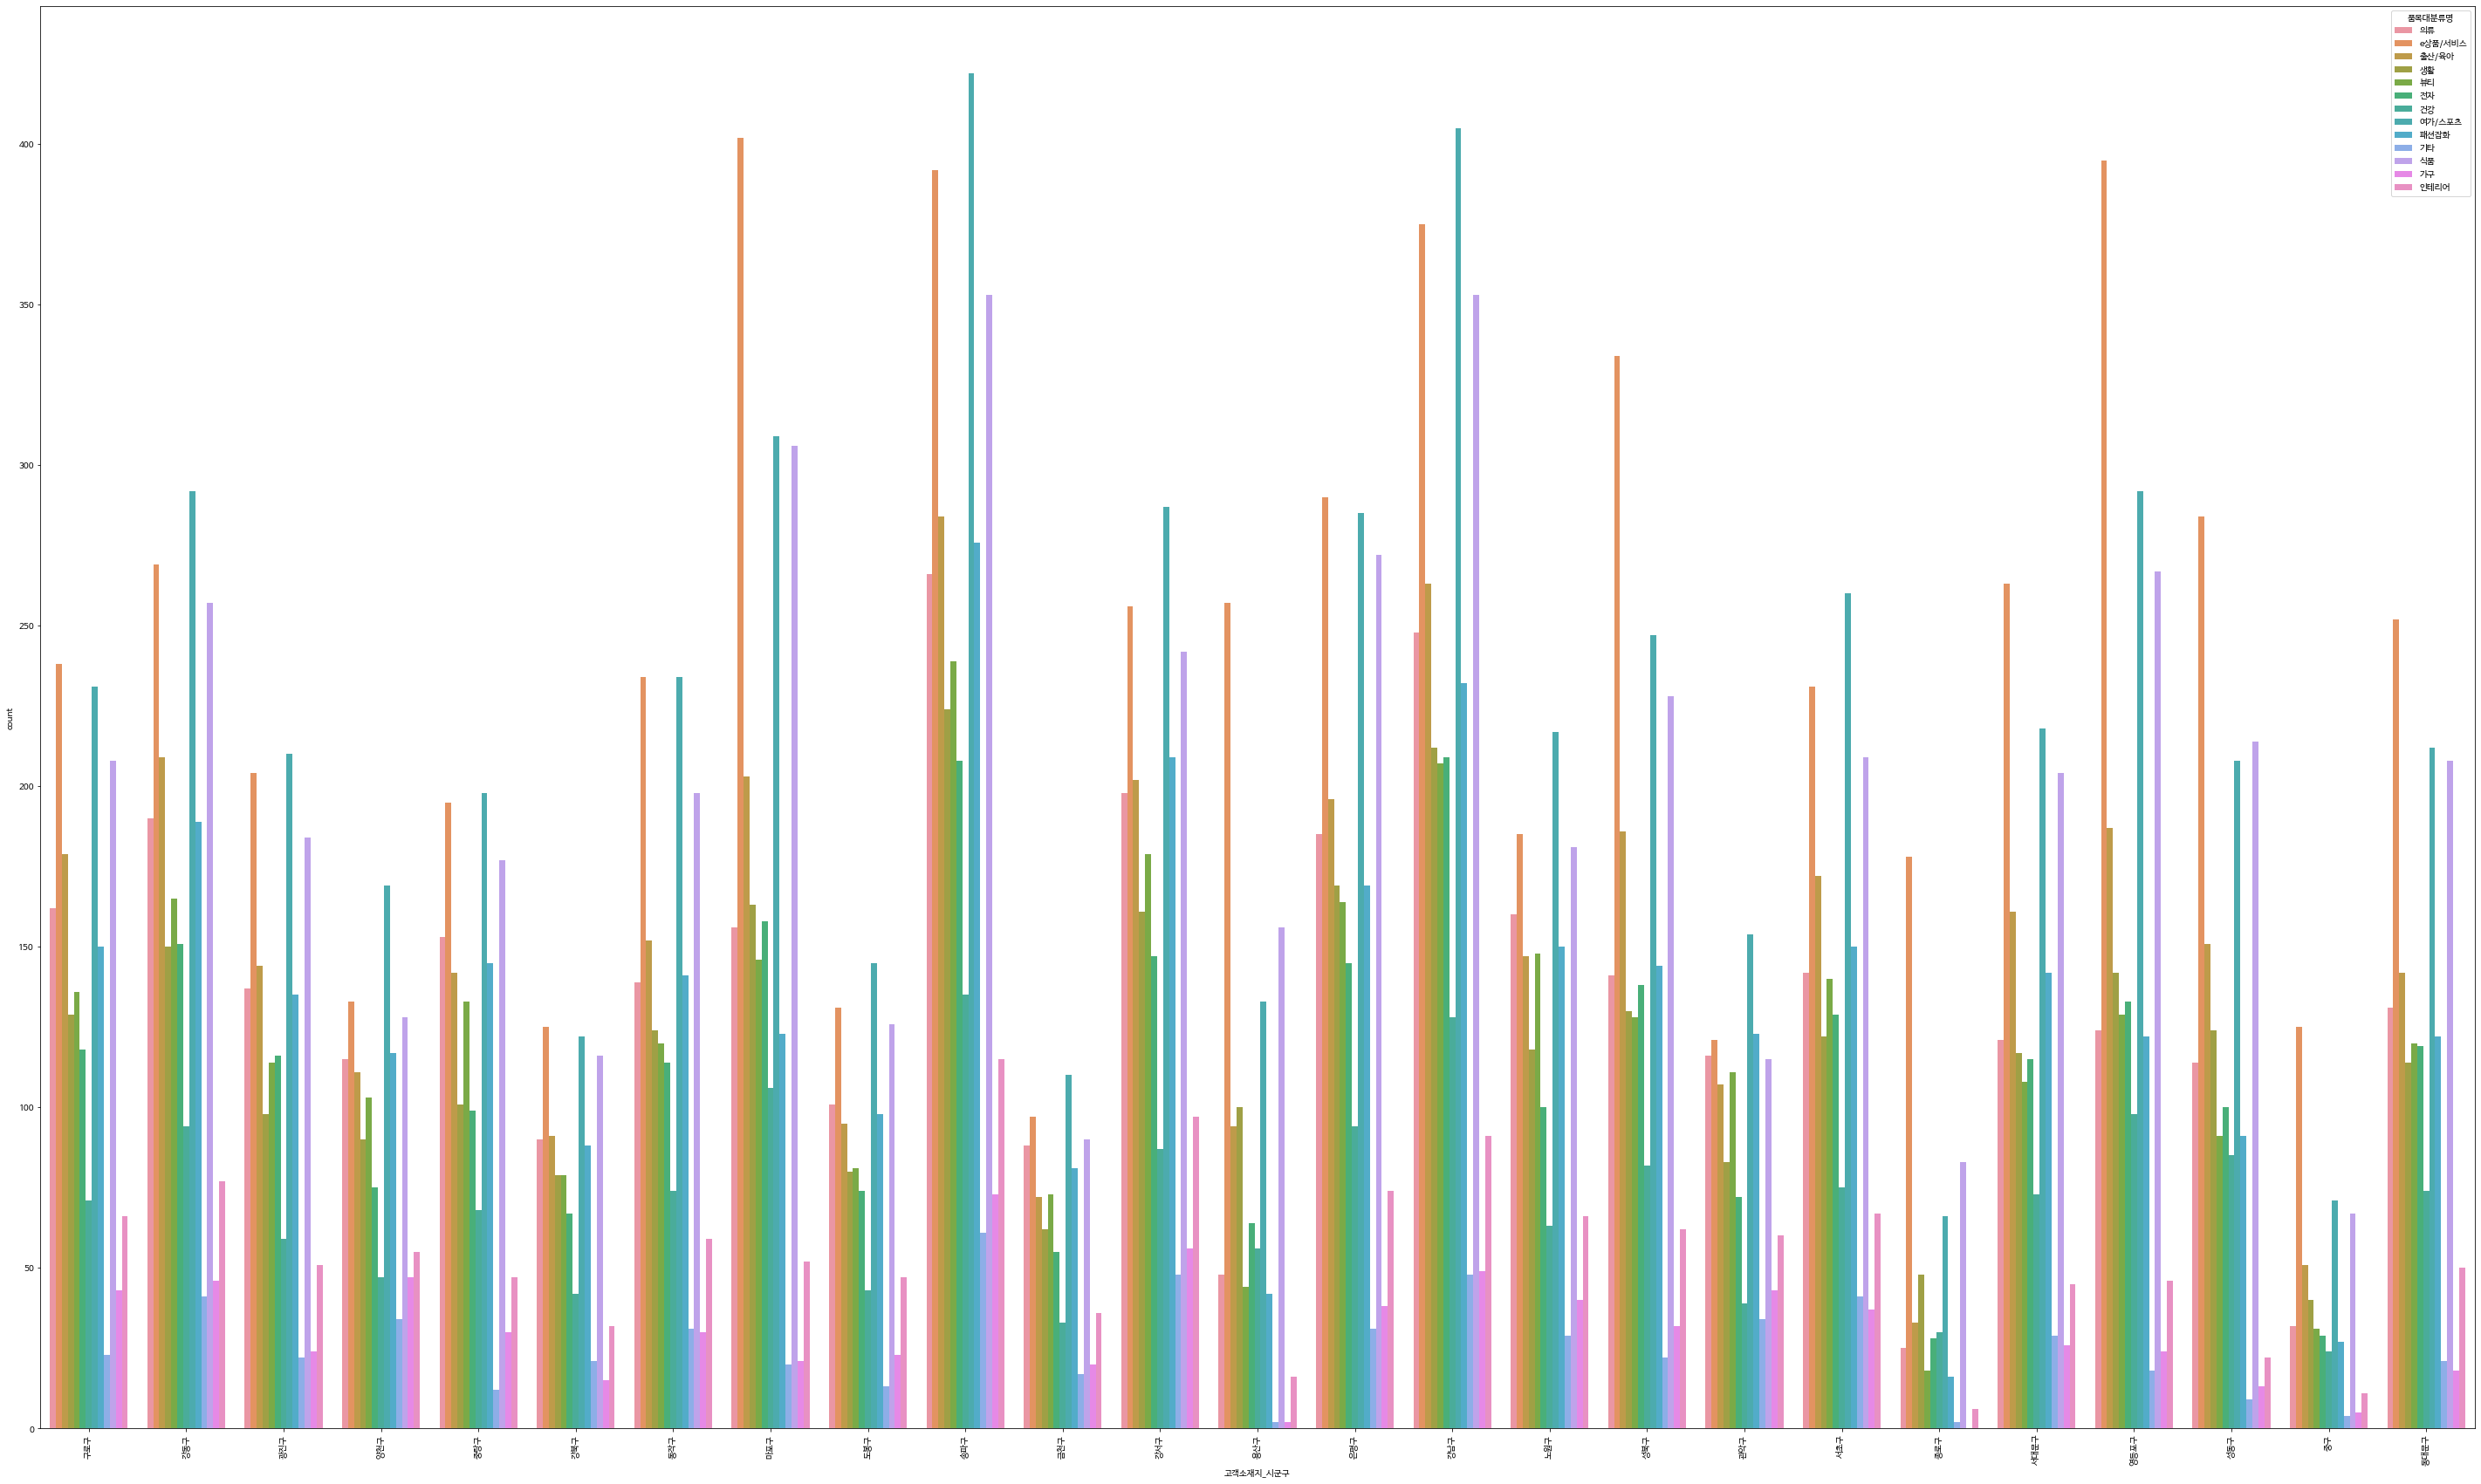

In [150]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

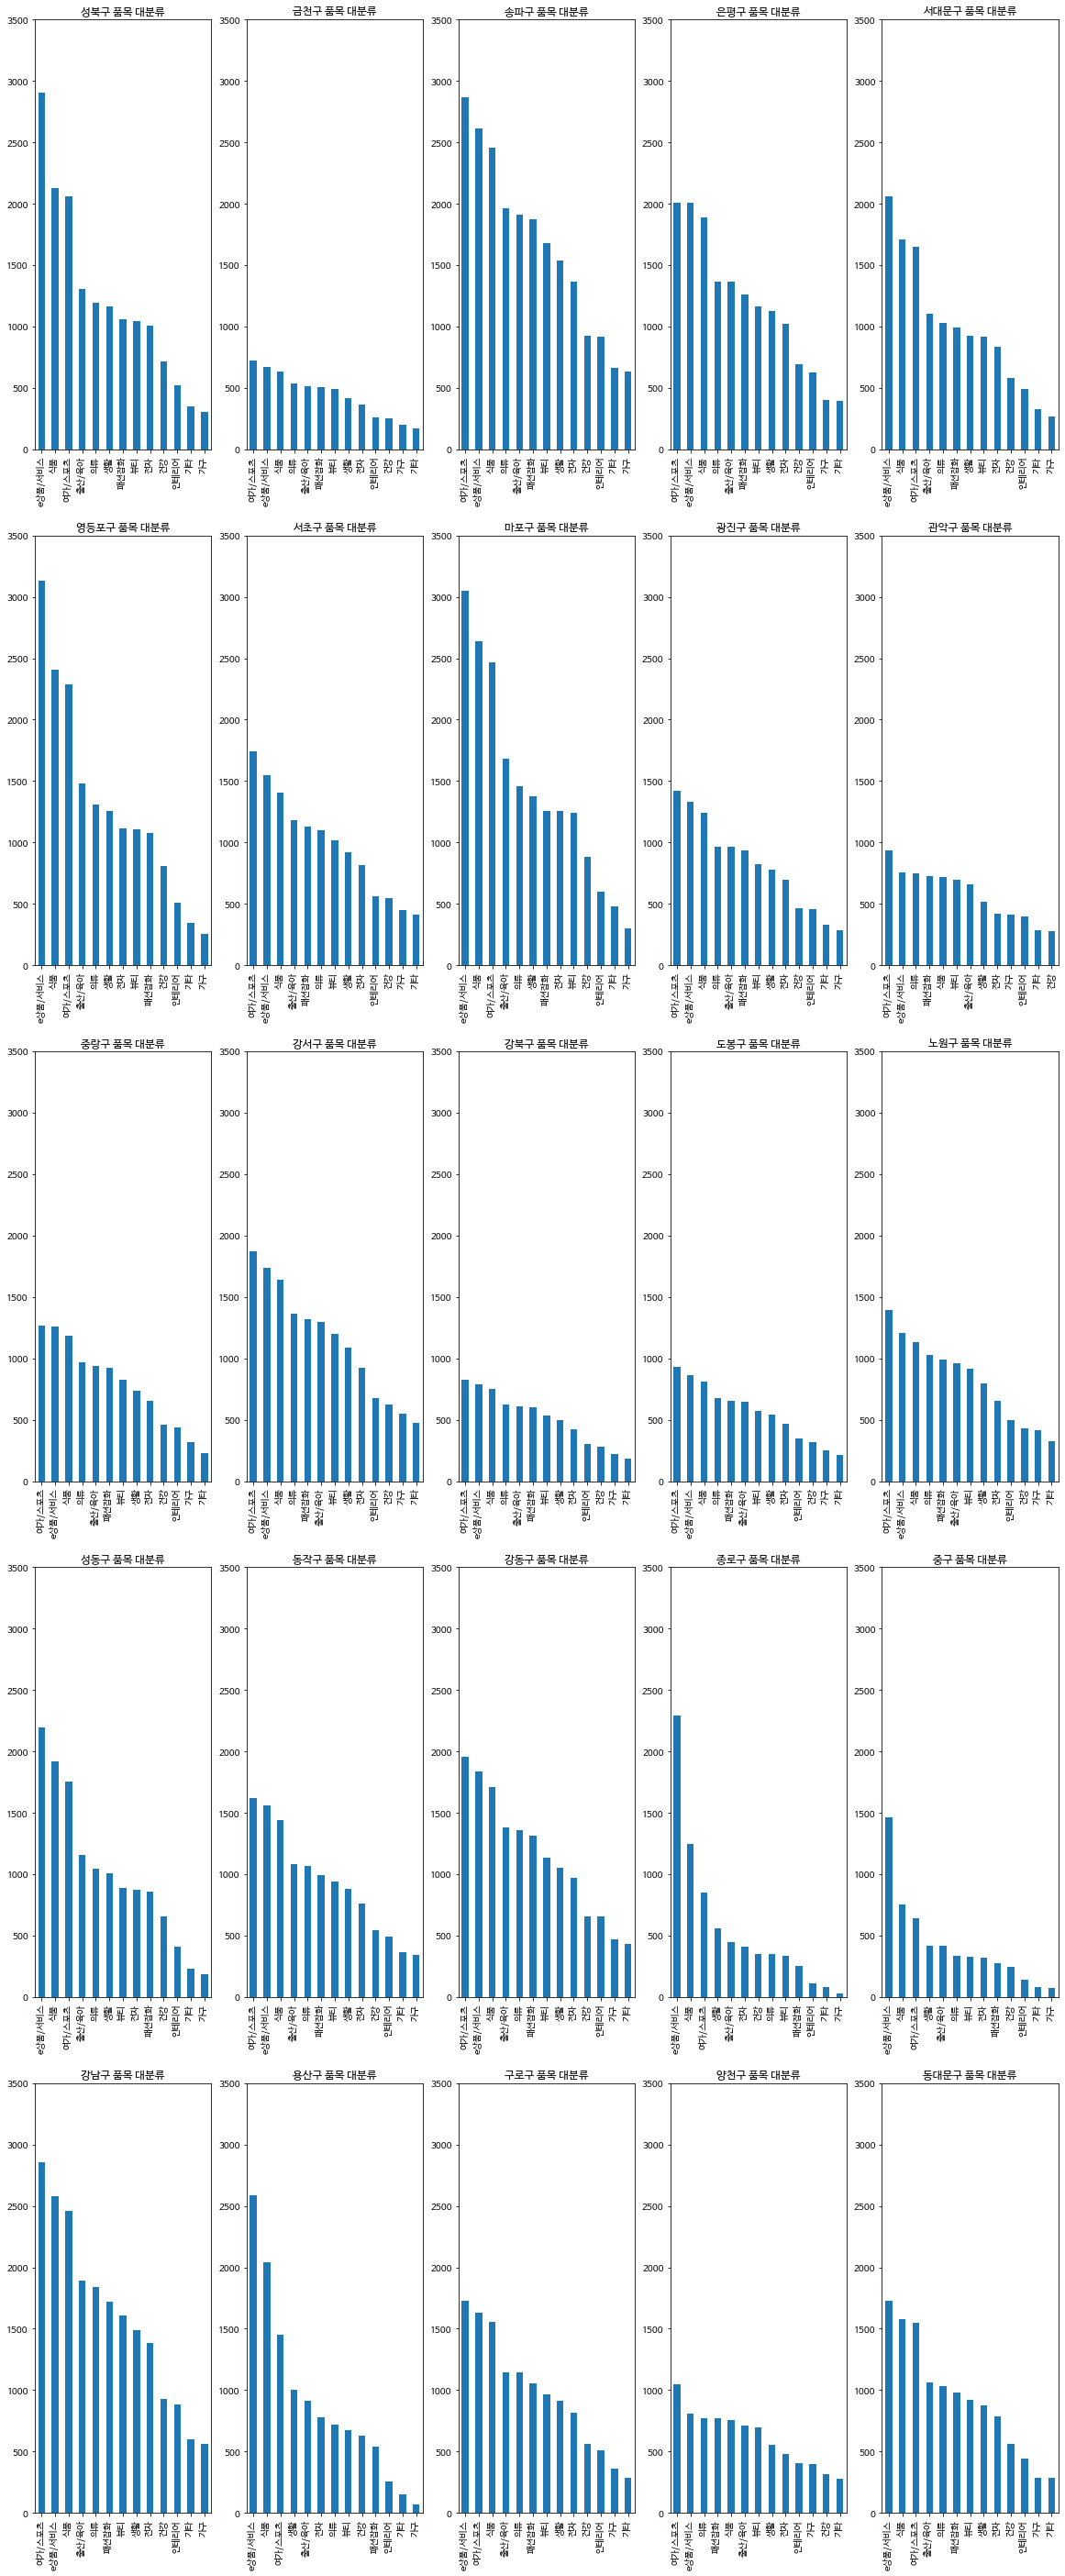

In [151]:
# 지역별 대분류 주문 회수
plt.figure(figsize=(20,50))

for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 3500])
    counties[i]['품목대분류명'].value_counts().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류')

plt.show()

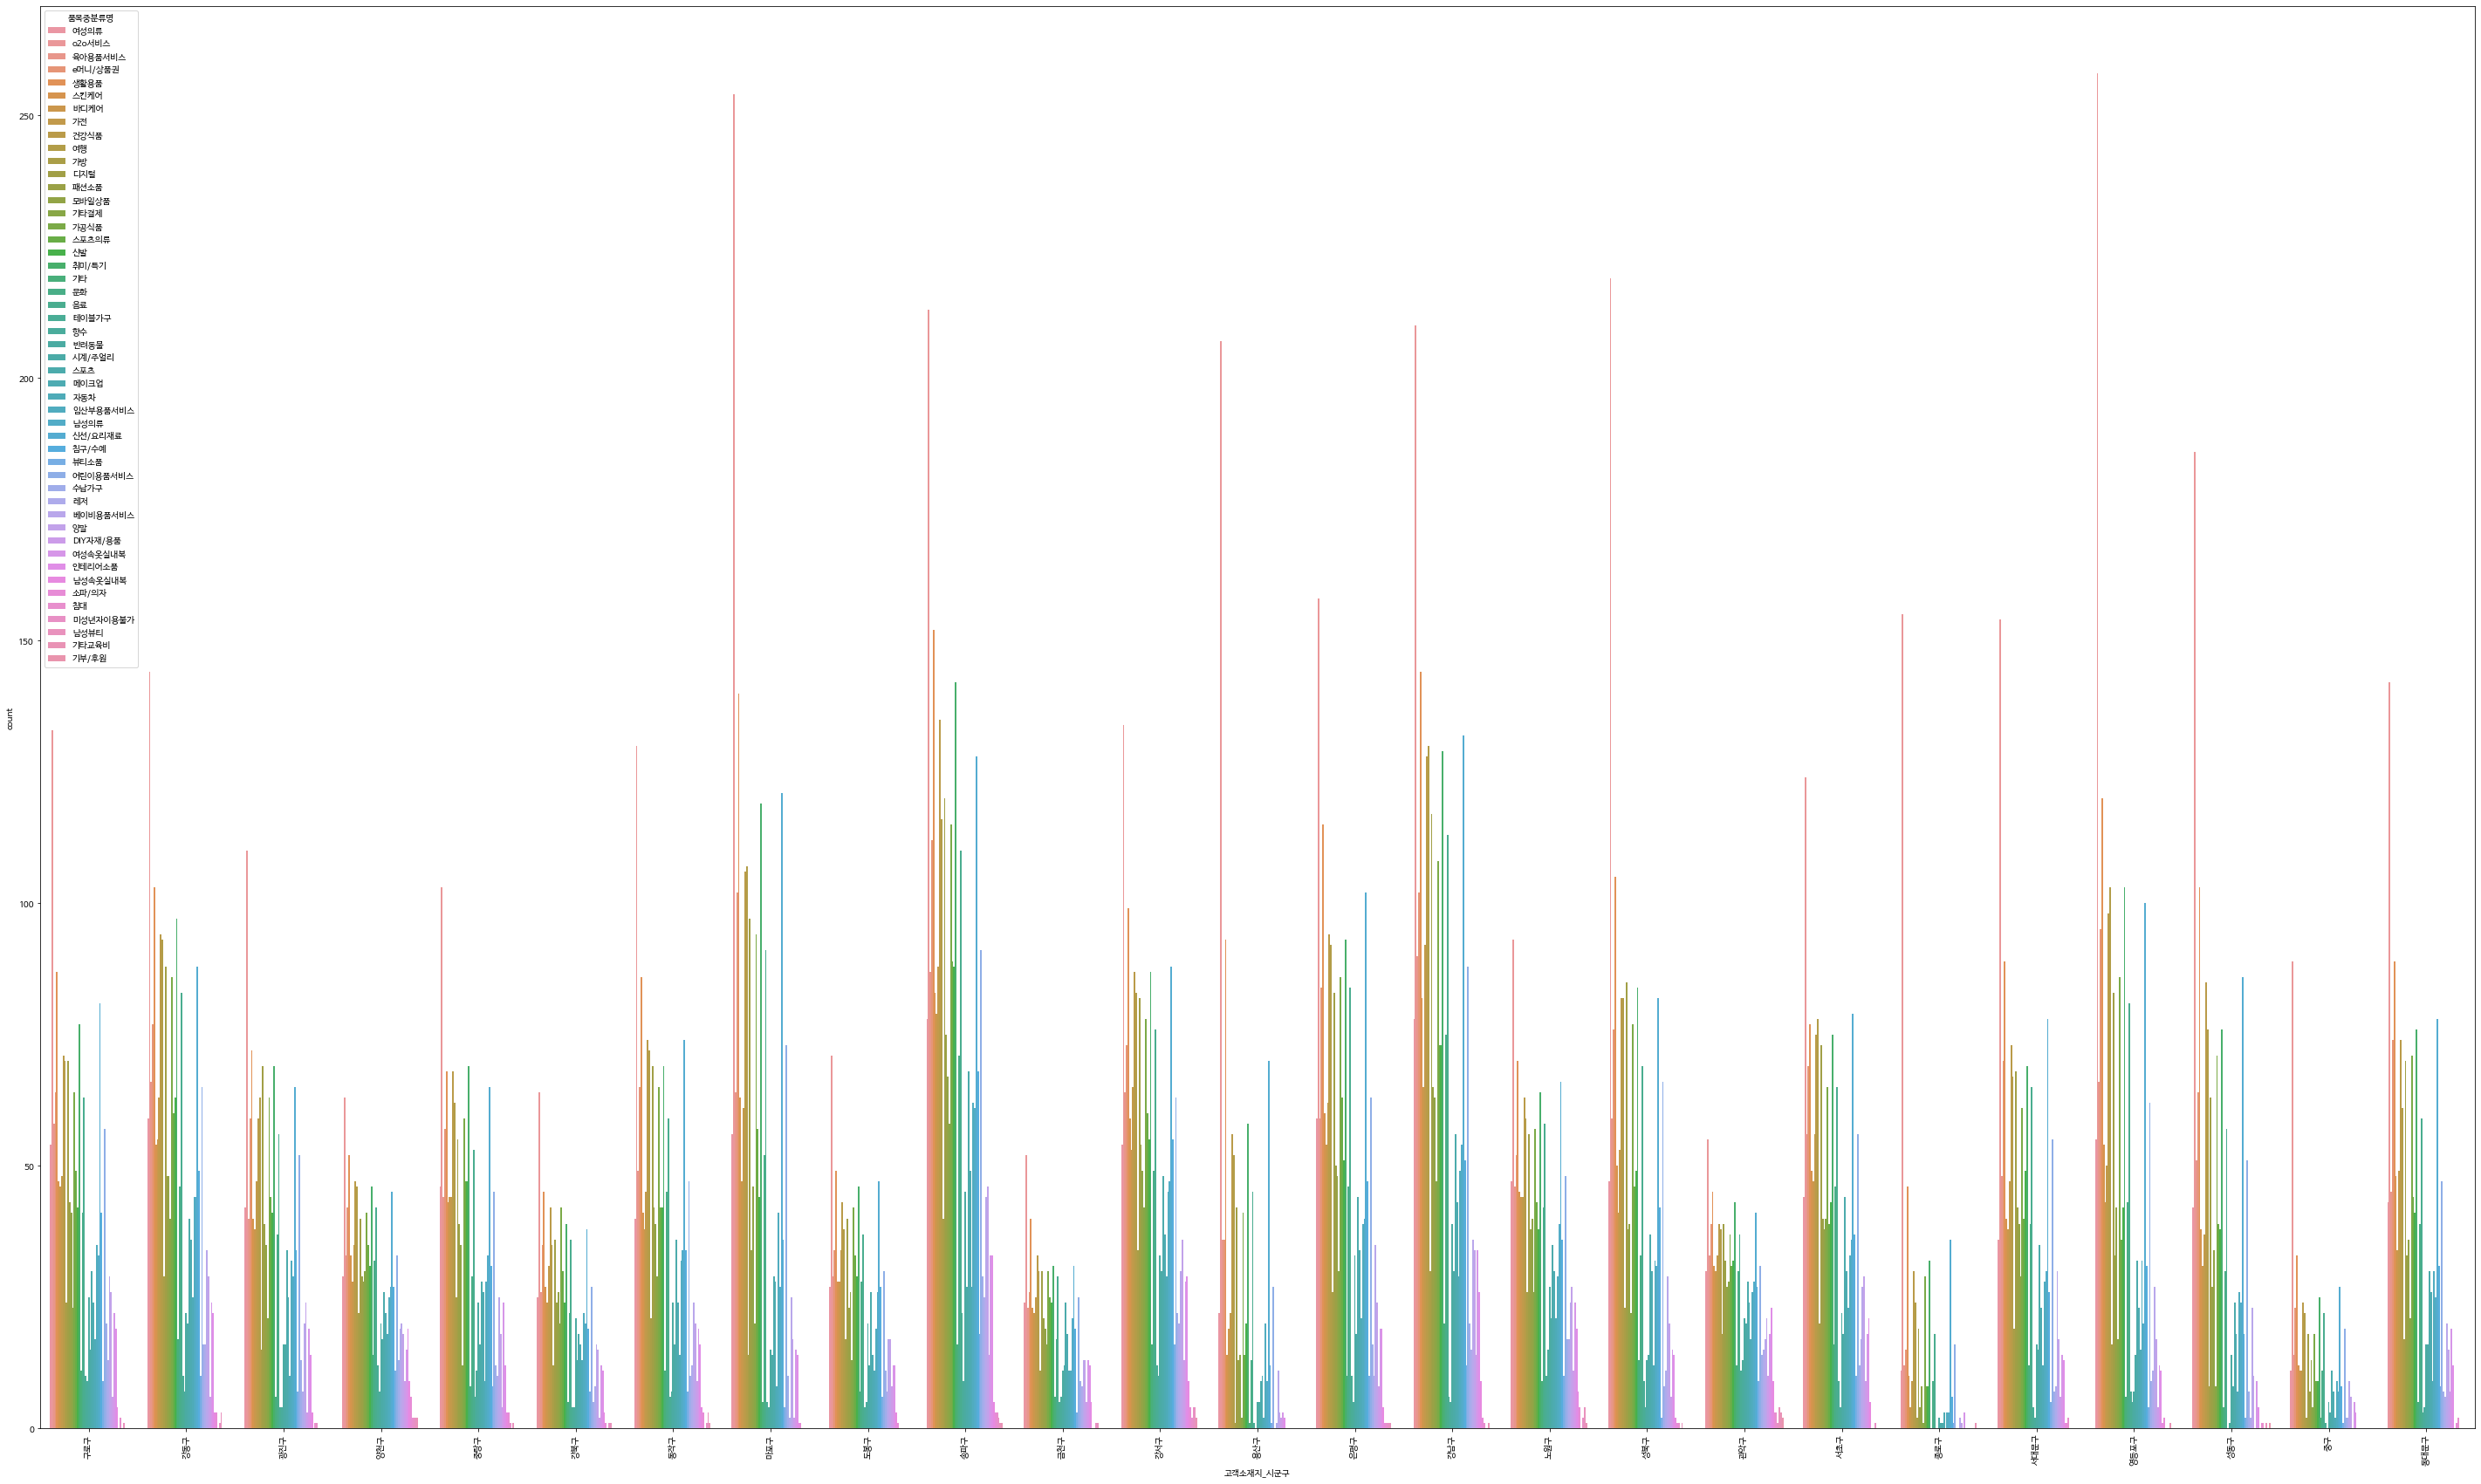

In [152]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목중분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

In [153]:
# 지역별 중분류 주문 회수
plt.figure(figsize=(200,150))

for i in range(len(sigoongu)):
    
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 2000])
    counties[i]['품목중분류명'].value_counts().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류')

plt.show()

고객소재지_시군구
강남구     10052580397
강동구      6249600505
강북구      3096844179
강서구      7996575845
관악구      6742253526
광진구      4498731023
구로구      5197081004
금천구      2802226811
노원구      6400448244
도봉구      3489468811
동대문구     4161533507
동작구      5184447110
마포구      5100395281
서대문구     4223591259
서초구      7336746380
성동구      3361433787
성북구      4554528426
송파구     10129774284
양천구      6177588682
영등포구     4755784861
용산구      2071933626
은평구      5393628539
종로구       892571672
중구       1298778418
중랑구      4356451939
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

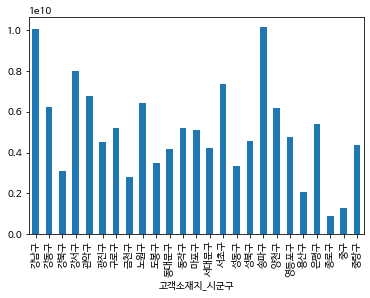

In [154]:
df_1903_매출금액합 = df_1903.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_1903_매출금액합)
df_1903_매출금액합.plot.bar()

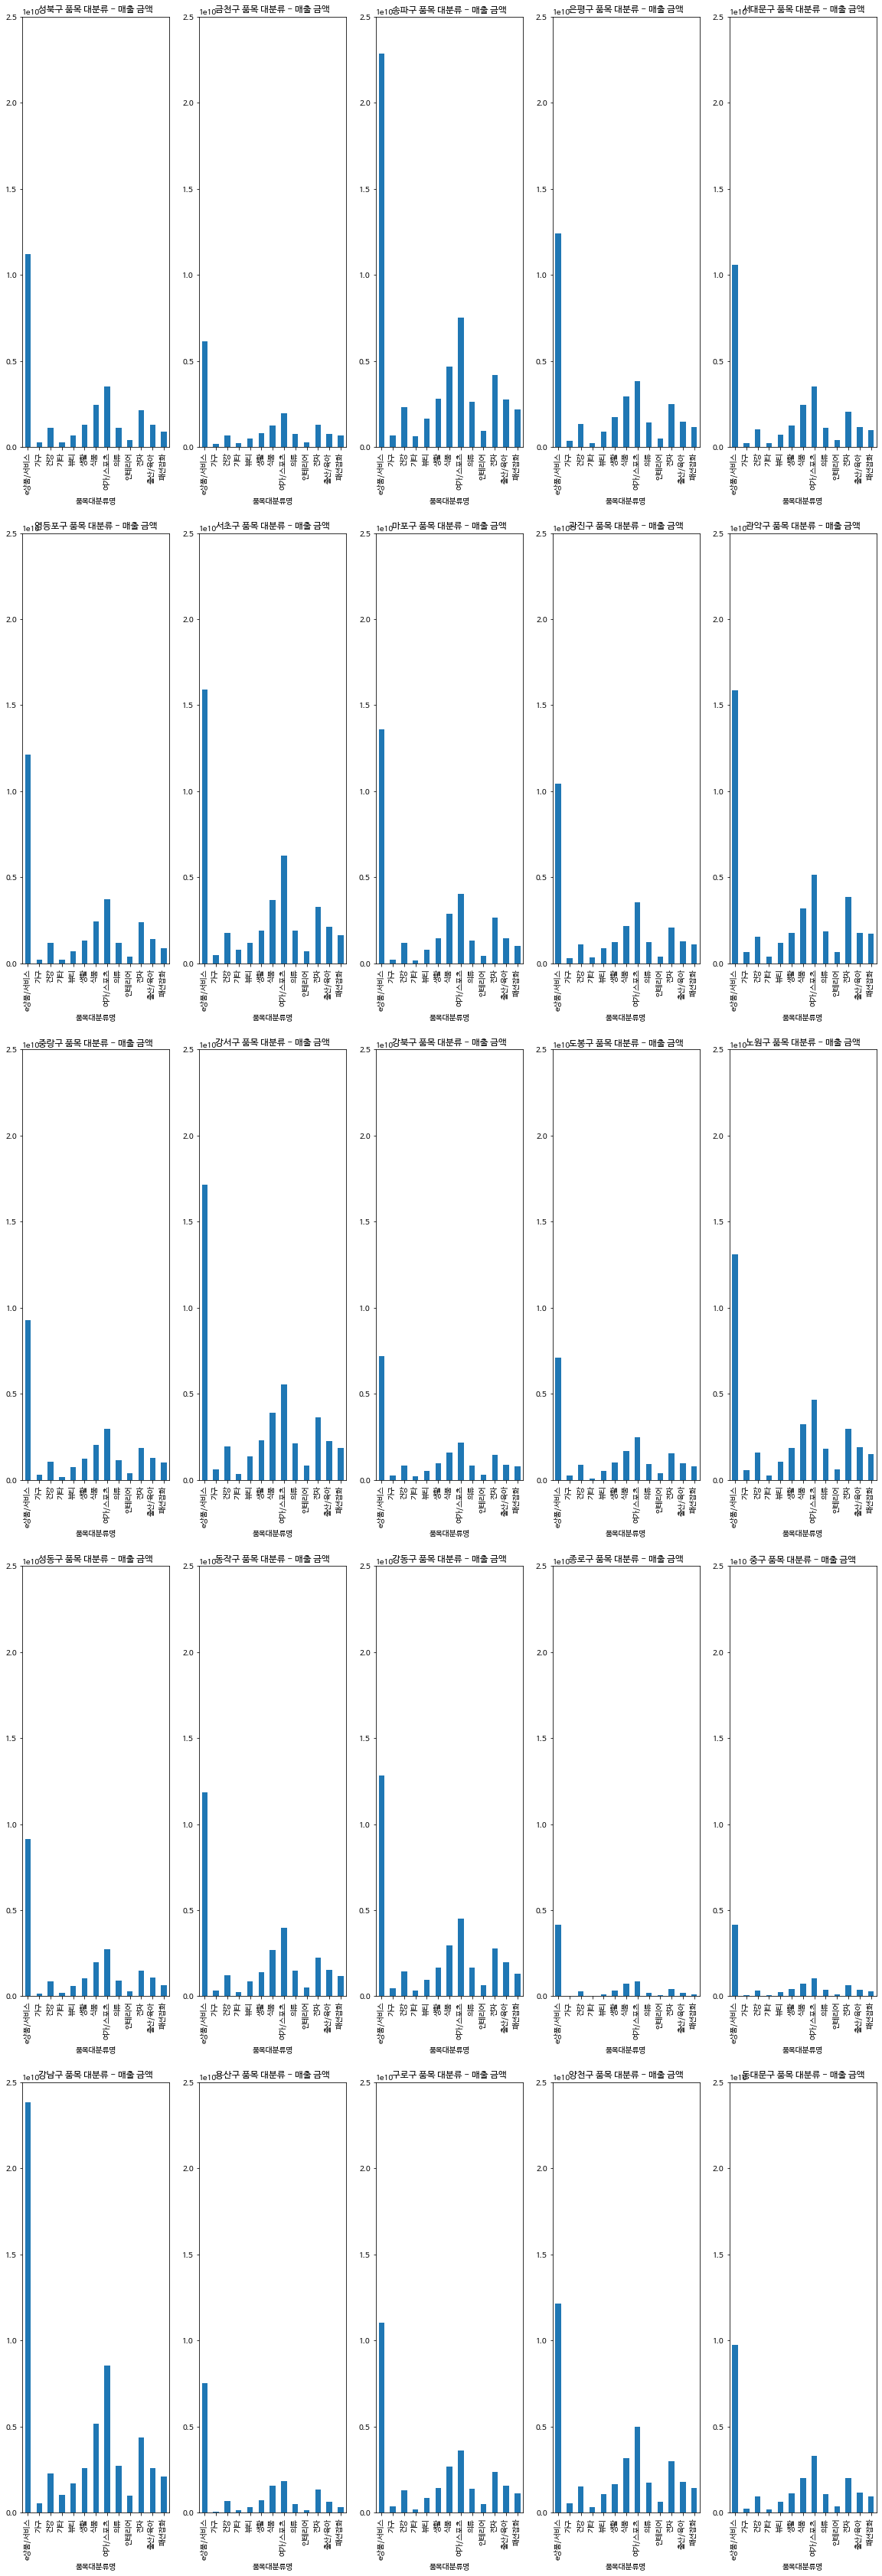

In [155]:
# 지역별 대품목 분류 - 매출 금액

plt.figure(figsize=(20,60))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 25000000000])
    counties[i].groupby('품목대분류명')['매출금액'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류 - 매출 금액')

plt.show()

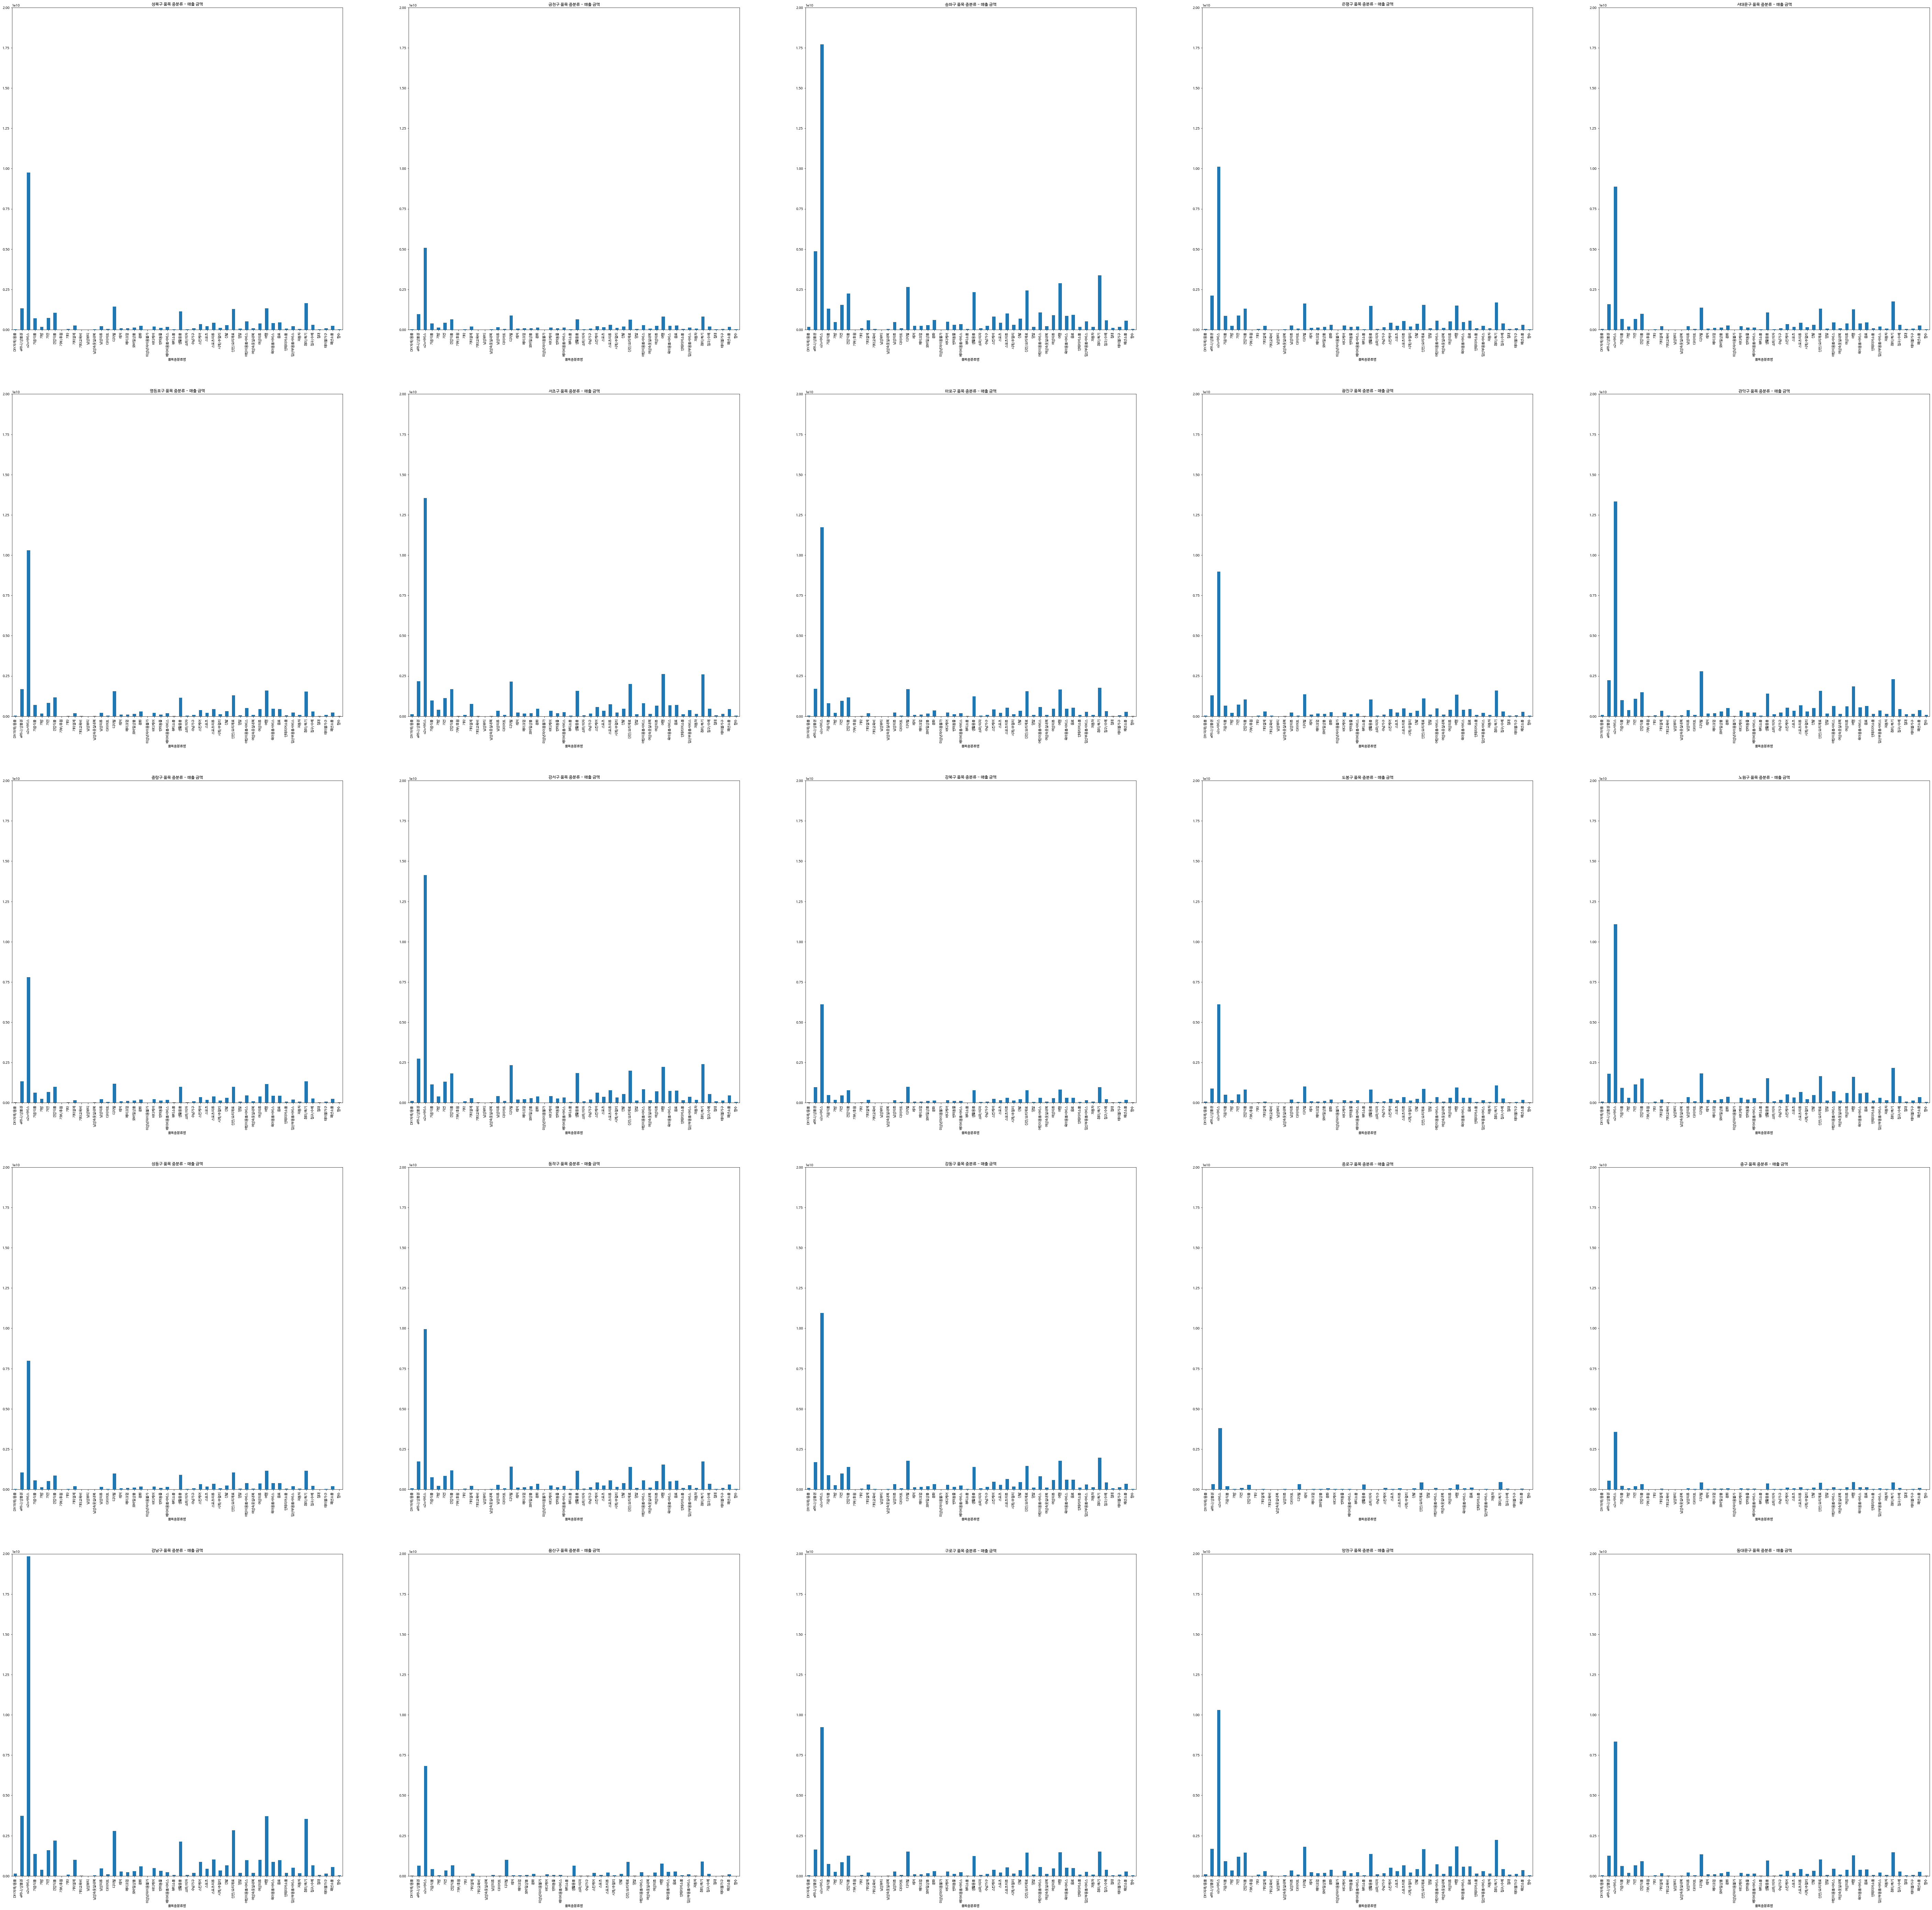

In [156]:
# 지역별 중품목 분류 - 매출 금액

plt.figure(figsize=(100,100))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 20000000000])
    counties[i].groupby('품목중분류명')['매출금액'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류 - 매출 금액')

plt.show()

고객소재지_시군구
강남구     188301
강동구     142187
강북구      76046
강서구     188326
관악구     173504
광진구     101395
구로구     123258
금천구      70316
노원구     151568
도봉구      80456
동대문구     93843
동작구     118405
마포구     111075
서대문구     93802
서초구     134238
성동구      72954
성북구     104958
송파구     206974
양천구     134693
영등포구    104668
용산구      42709
은평구     128092
종로구      19862
중구       28566
중랑구     107936
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

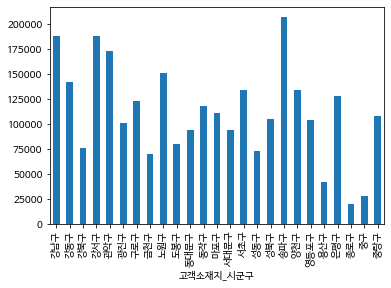

In [157]:
df_1903_매출건수합 = df_1903.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_1903_매출건수합)
df_1903_매출건수합.plot.bar()

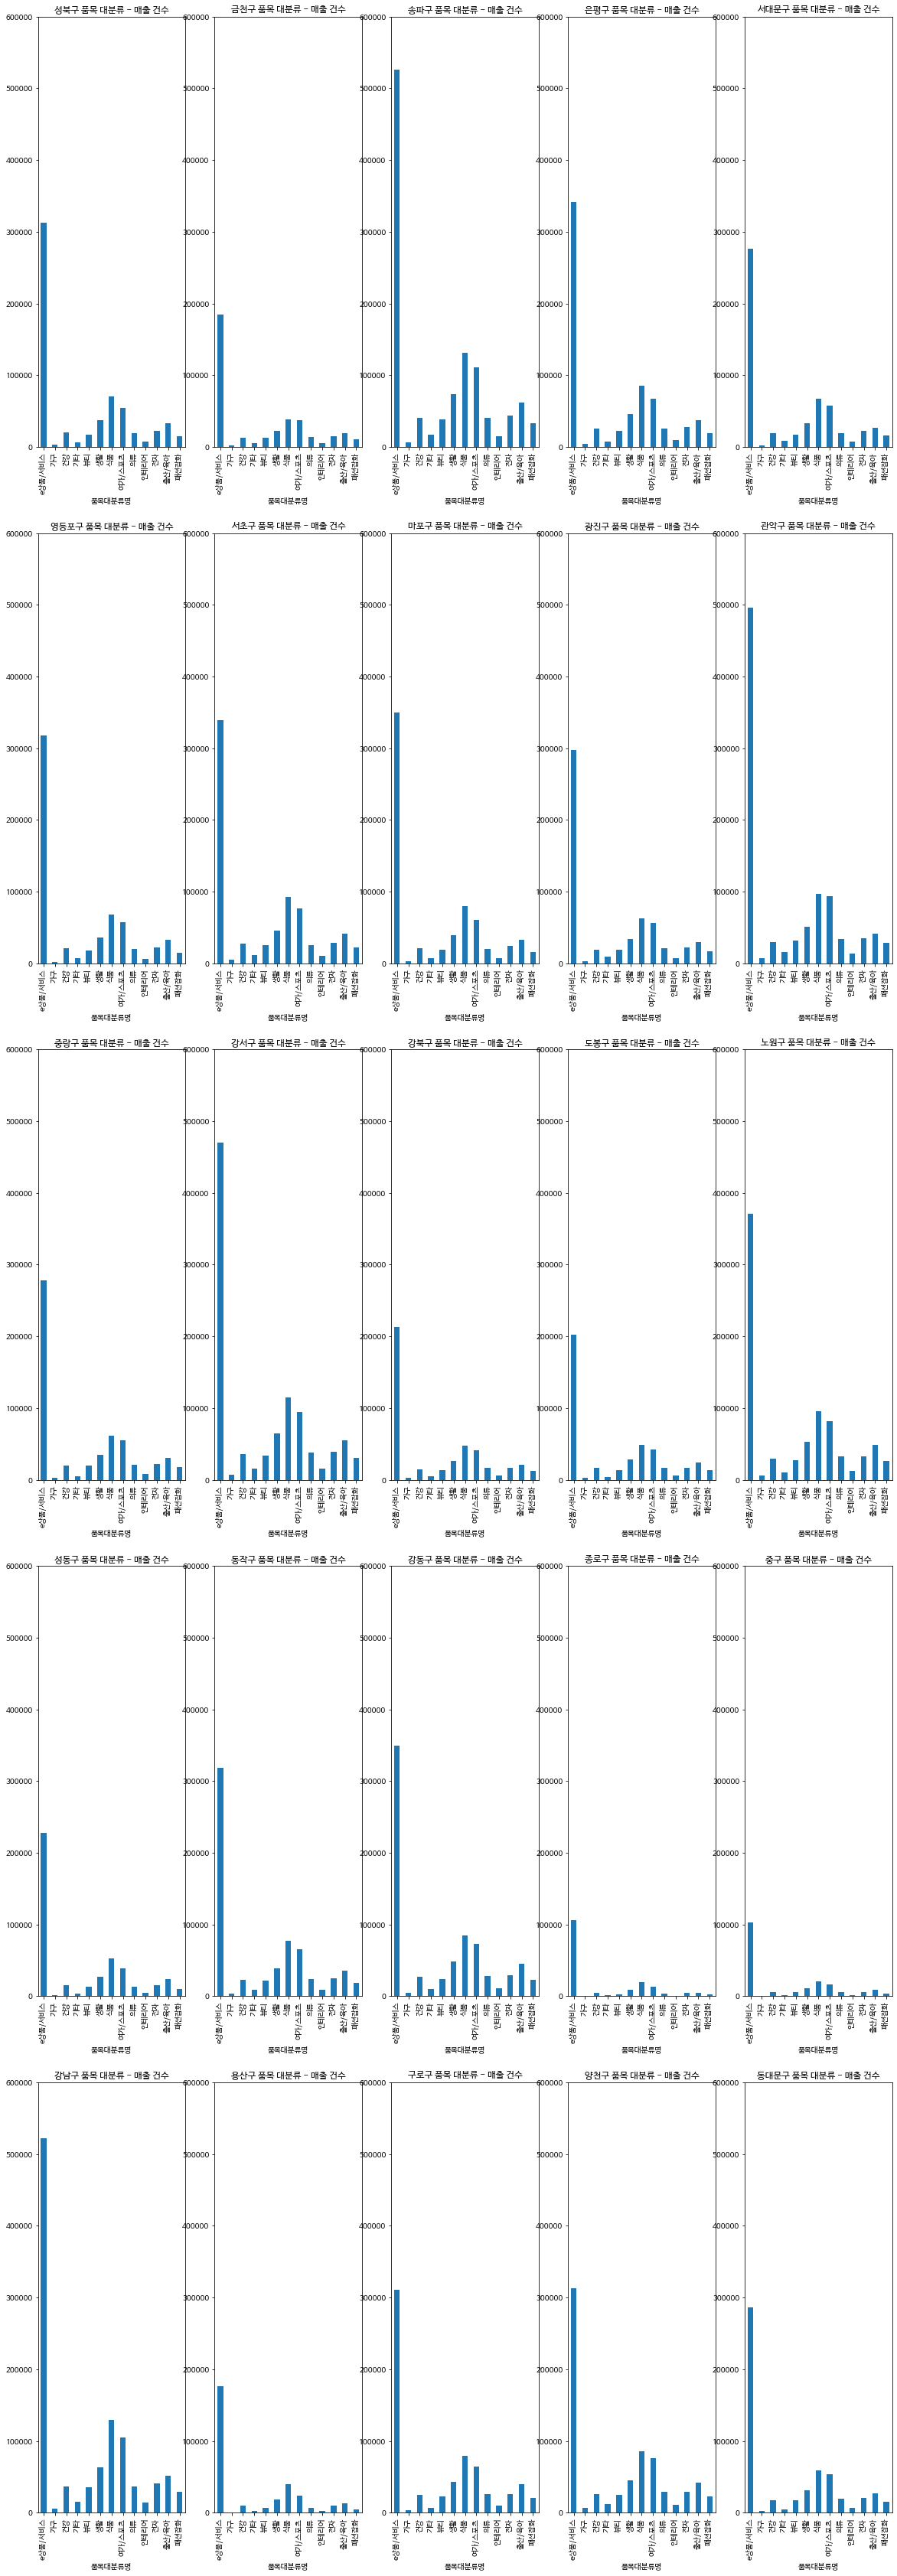

In [158]:
# 지역별 대품목 분류 - 매출 건수

plt.figure(figsize=(20,60))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 600000])
    counties[i].groupby('품목대분류명')['매출건수'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류 - 매출 건수')

plt.show()

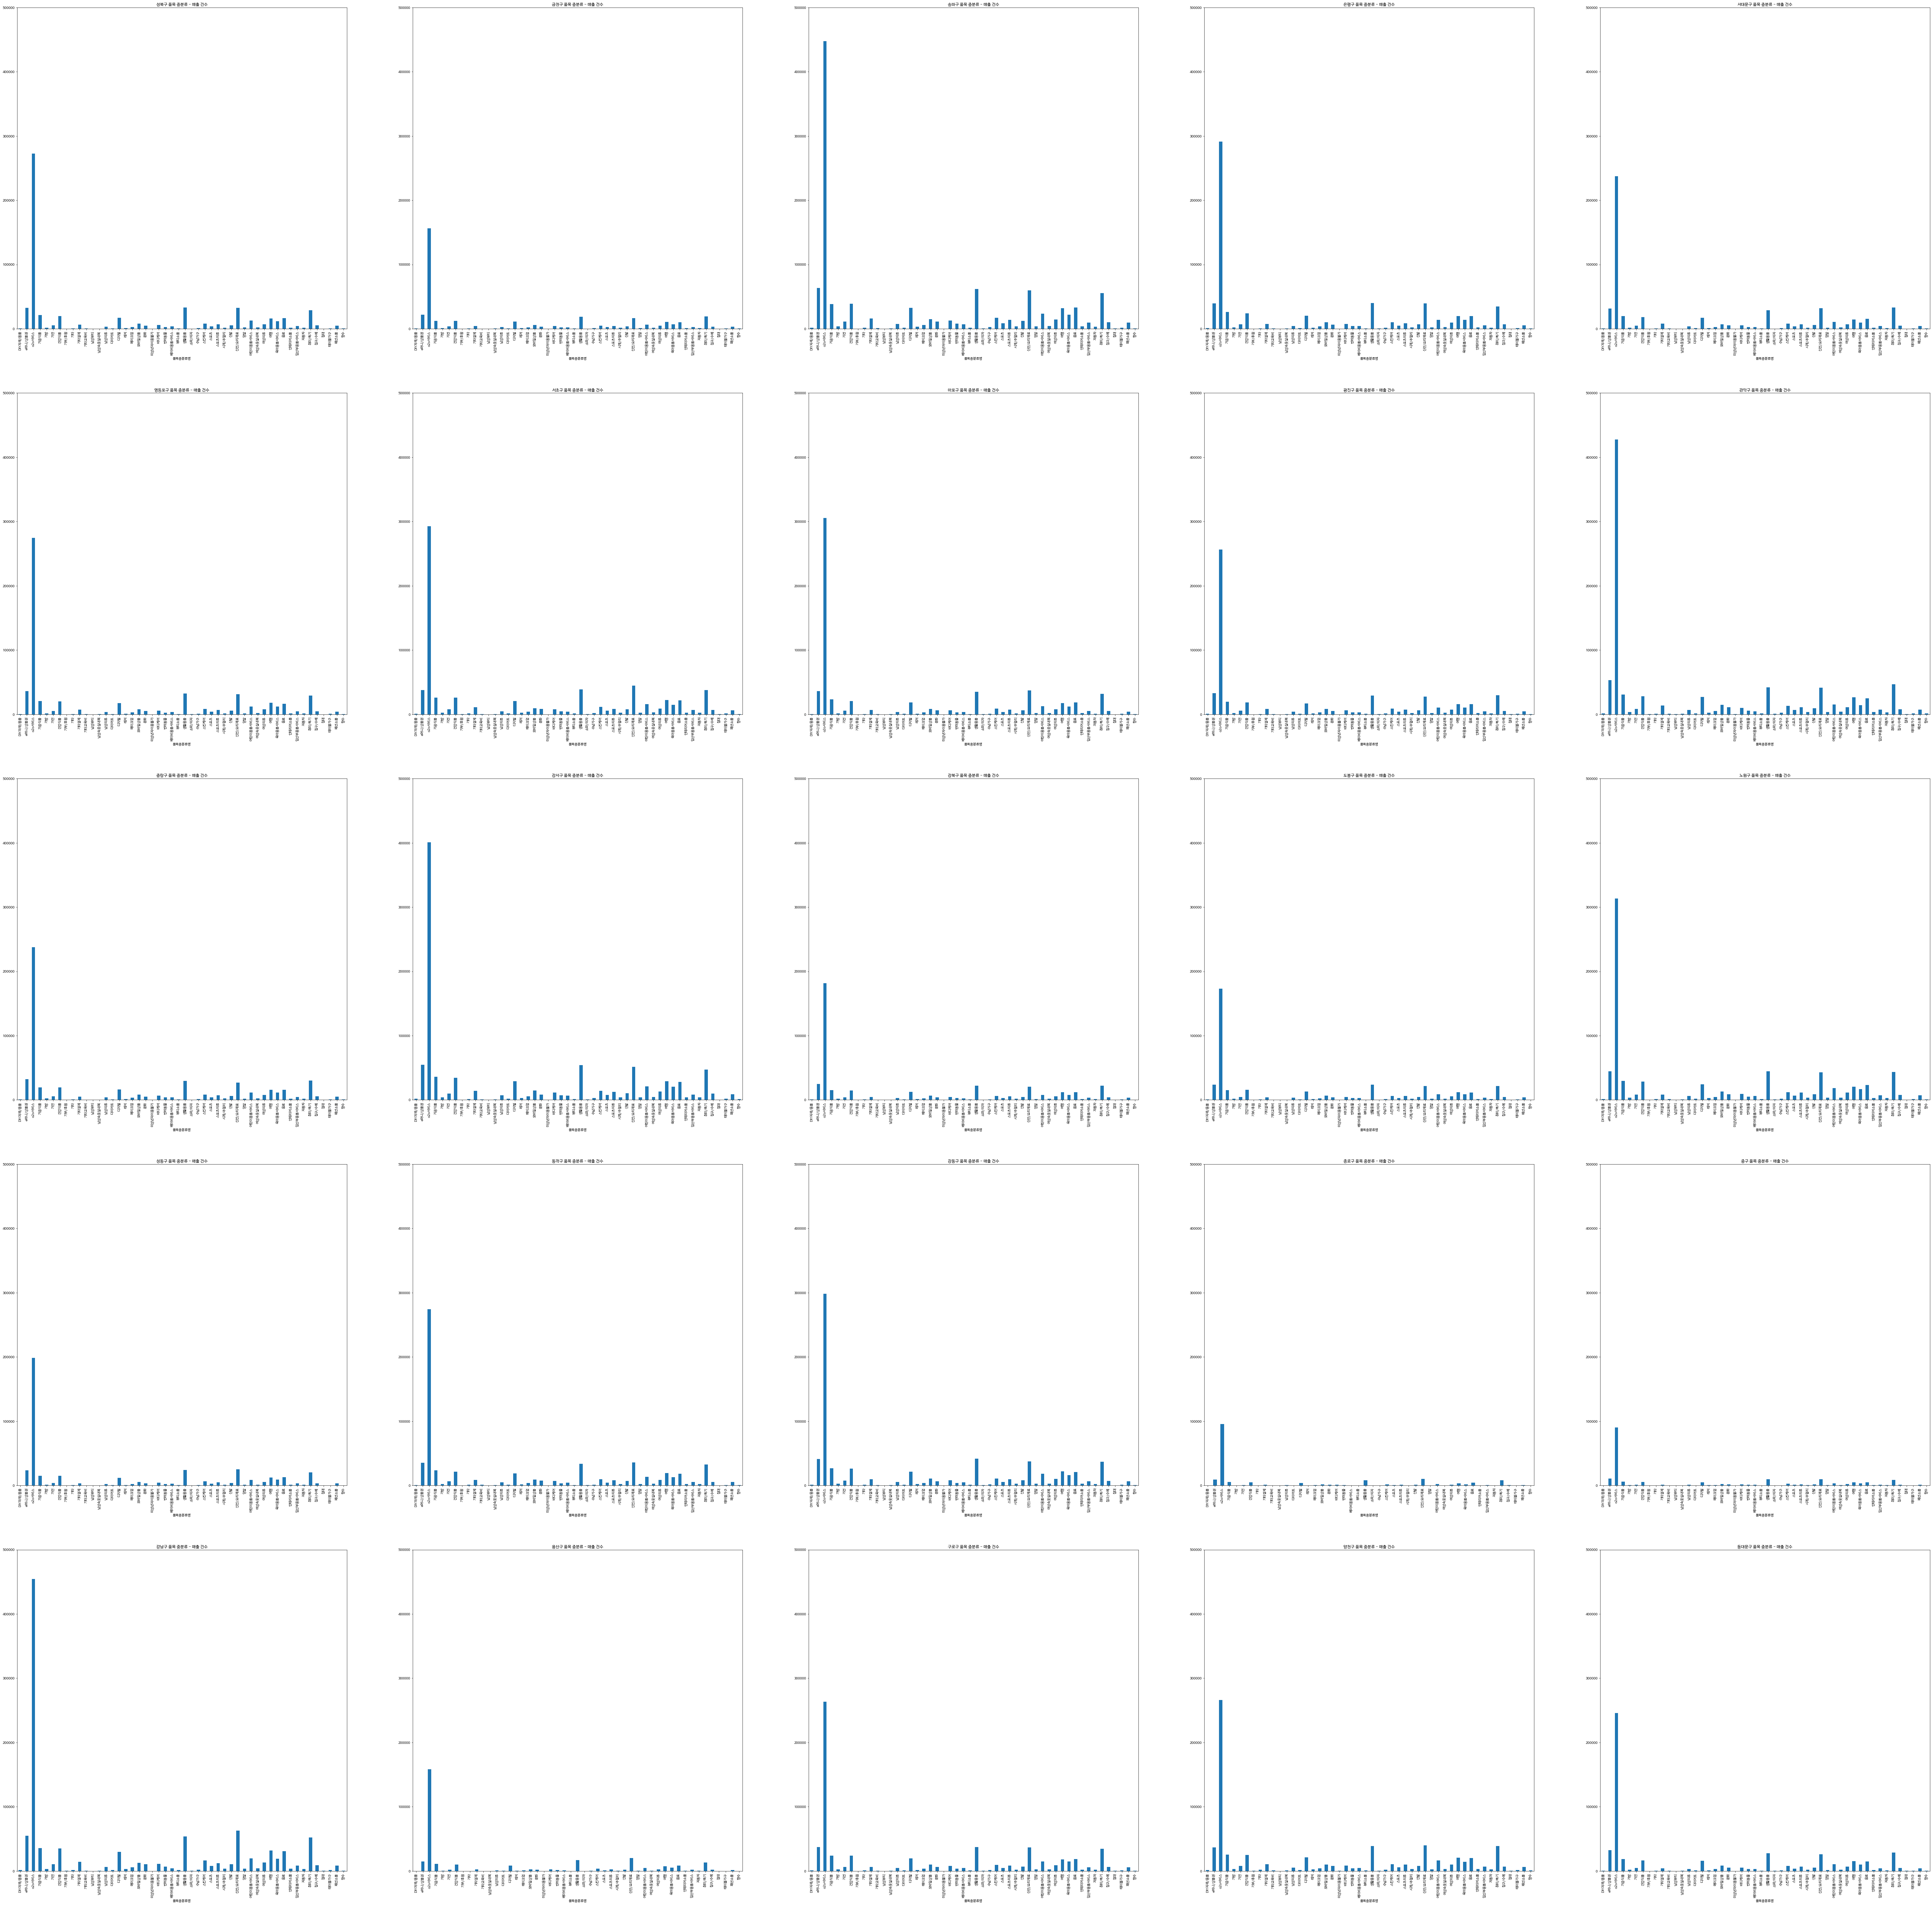

In [159]:
# 지역별 중품목 분류 - 매출 건수

plt.figure(figsize=(100,100))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 500000])
    counties[i].groupby('품목중분류명')['매출건수'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류 - 매출 건수')

plt.show()